Predicted class: blue


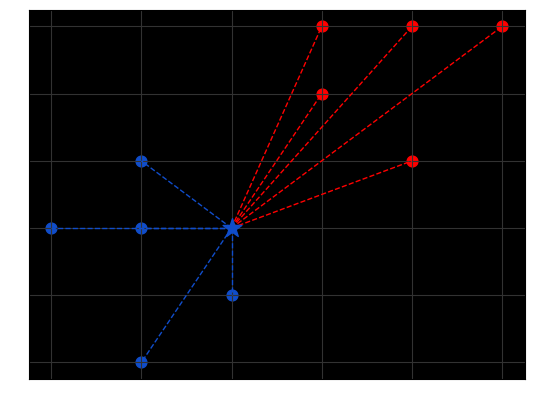

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

points = {
    "green": [[2,4], [1,3], [2,3], [3,2], [2,1]],
    "yellow": [[5,6], [4,5], [4,6], [6,6], [5,4]]
}

new_point = [4,4]

def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

class KNearestNeighbors:

    def __init__(self, k=3):
        self.k = k

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                dist = euclidean_distance(point, new_point)
                distances.append([dist, category])

        # sort by distance
        distances.sort(key=lambda x: x[0])

        # take k nearest labels
        categories = [label for _, label in distances[:self.k]]

        # majority vote
        result = Counter(categories).most_common(1)[0][0]
        return result


clf = KNearestNeighbors(k=3)
clf.fit(points)

prediction = clf.predict(new_point)
print("Predicted class:", prediction)

ax = plt.subplot()
ax.grid(True, color="#323232")
ax.set_facecolor("black")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")

# plot training points
for point in points["blue"]:
    ax.scatter(point[0], point[1], color="#104DCA", s=60)

for point in points["red"]:
    ax.scatter(point[0], point[1], color="#FF0000", s=60)

# plot new point
color = "#FF0000" if prediction == "red" else "#104DCA"
ax.scatter(new_point[0], new_point[1], color=color, marker="*", s=200, zorder=100)

# draw distance lines
for point in points["blue"]:
    ax.plot([new_point[0], point[0]],
            [new_point[1], point[1]],
            color="#104DCA", linestyle="--", linewidth=1)

for point in points["red"]:
    ax.plot([new_point[0], point[0]],
            [new_point[1], point[1]],
            color="#FF0000", linestyle="--", linewidth=1)

plt.show()